In [178]:
# Imports
import investpy
import pandas as pd
import numpy as np
import yfinance as yf

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

# Import Wheat Data

In [179]:
wheat_df = investpy.get_commodity_historical_data(commodity = 'US Wheat',country = 'united states',
                                                  from_date = '01/01/2012',to_date = '01/01/2022')
wheat_df.head(5)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2012-01-02,653.13,653.13,653.13,653.13,0,USD
2012-01-03,665.88,670.50,654.00,658.38,0,USD
2012-01-04,656.38,661.13,645.63,650.13,0,USD
2012-01-05,649.13,650.13,627.13,627.38,0,USD
2012-01-06,629.38,636.88,624.63,624.63,0,USD


# Editing the Data to specify the Close price and giving the colum name a more specific name.

In [180]:
wheat_df = wheat_df.drop(['Open','High','Low','Volume','Currency'], axis=1)
wheat_df = wheat_df.rename(columns = {'Close': 'Wheat'})
wheat_df.head(5)

,Wheat
Date,
2012-01-02,653.13
2012-01-03,658.38
2012-01-04,650.13
2012-01-05,627.38
2012-01-06,624.63


# Import Crude Data

In [181]:
crude_df = investpy.get_commodity_historical_data(commodity = 'Crude Oil WTI', country = 'united states',
                                                  from_date = '01/01/2012',to_date = '01/01/2022')
crude_df.head(5)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2012-01-03,99.70,103.18,99.65,102.96,275481,USD
2012-01-04,102.99,103.74,101.88,103.22,271711,USD
2012-01-05,103.29,103.73,101.30,101.81,295615,USD
2012-01-06,101.35,102.80,100.88,101.56,290458,USD
2012-01-09,101.92,102.15,100.10,101.31,311866,USD


# Edit and clean data

In [182]:
crude_df = crude_df.drop(['Open','High','Low','Volume','Currency'],axis=1)
crude_df = crude_df.rename(columns = {'Close': 'Crude'})
crude_df.head(5)

,Crude
Date,
2012-01-03,102.96
2012-01-04,103.22
2012-01-05,101.81
2012-01-06,101.56
2012-01-09,101.31


# Import Carbon futures data

In [183]:
carbon_df = pd.read_csv("../Data/Carbon Emissions Futures Historical Data.csv")
carbon_df.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2022",81.98,80.33,82.19,79.87,11.33K,1.67%
1,"Aug 01, 2022",80.63,78.10,80.83,78.10,10.51K,2.49%
2,"Jul 29, 2022",78.67,78.96,79.50,77.57,11.48K,-0.04%
3,"Jul 28, 2022",78.70,76.07,80.10,76.07,14.23K,3.19%
4,"Jul 27, 2022",76.27,76.61,77.79,75.80,13.54K,-0.64%


# Edit Carbon data

In [184]:
carbon_df.reset_index()
carbon_df.rename(columns={'Price':'Carbon Futures'})
carbon_df['Date'] = pd.to_datetime(carbon_df.Date)
carbon_df['Date'] = carbon_df['Date'].dt.strftime('%Y-%m-%d')

carbon_df.head(5)


,Date,Price,Open,High,Low,Vol.,Change %
0,2022-08-02,81.98,80.33,82.19,79.87,11.33K,1.67%
1,2022-08-01,80.63,78.10,80.83,78.10,10.51K,2.49%
2,2022-07-29,78.67,78.96,79.50,77.57,11.48K,-0.04%
3,2022-07-28,78.70,76.07,80.10,76.07,14.23K,3.19%
4,2022-07-27,76.27,76.61,77.79,75.80,13.54K,-0.64%


In [185]:
carbon_df = carbon_df.set_index("Date")
carbon_df.head(5)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-08-02,81.98,80.33,82.19,79.87,11.33K,1.67%
2022-08-01,80.63,78.10,80.83,78.10,10.51K,2.49%
2022-07-29,78.67,78.96,79.50,77.57,11.48K,-0.04%
2022-07-28,78.70,76.07,80.10,76.07,14.23K,3.19%
2022-07-27,76.27,76.61,77.79,75.80,13.54K,-0.64%


In [186]:
crude_df = crude_df.rename(columns = {'Price': 'Carbon'})
crude_df.head(5)

,Crude
Date,
2012-01-03,102.96
2012-01-04,103.22
2012-01-05,101.81
2012-01-06,101.56
2012-01-09,101.31


In [187]:
crude_df.index = pd.to_datetime(crude_df.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
carbon_df.index = pd.to_datetime(carbon_df.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
wheat_df.index = pd.to_datetime(wheat_df.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')

In [188]:
crudecarbon = pd.merge(crude_df,carbon_df,on="Date", how='inner')
crudecarbon = crudecarbon.drop(['Open','High','Low','Vol.','Change %'],axis=1)
crudecarbon.rename(columns={'Price':'Carbon'}, inplace=True)
crudecarbon

,Crude,Carbon
Date,,
2012-01-03,102.96,6.28
2012-01-04,103.22,6.27
2012-01-05,101.81,6.43
2012-01-06,101.56,6.30
2012-01-09,101.31,11.00
...,...,...
2021-12-27,75.57,76.92
2021-12-28,75.98,79.29
2021-12-29,76.56,80.36


In [189]:
wheatcrudecarbon = pd.merge(crudecarbon,wheat_df, on='Date',how='inner')
wheatcrudecarbon

,Crude,Carbon,Wheat
Date,,,
2012-01-03,102.96,6.28,658.38
2012-01-04,103.22,6.27,650.13
2012-01-05,101.81,6.43,627.38
2012-01-06,101.56,6.30,624.63
2012-01-09,101.31,11.00,642.38
...,...,...,...
2021-12-27,75.57,76.92,804.00
2021-12-28,75.98,79.29,783.50
2021-12-29,76.56,80.36,787.75


In [190]:
wheatcrudecarbon.rename(columns={'Price':'Carbon'}, inplace=True)

In [191]:
returns = wheatcrudecarbon.dropna()
returns.head(3)

,Crude,Carbon,Wheat
Date,,,
2012-01-03,102.96,6.28,658.38
2012-01-04,103.22,6.27,650.13
2012-01-05,101.81,6.43,627.38


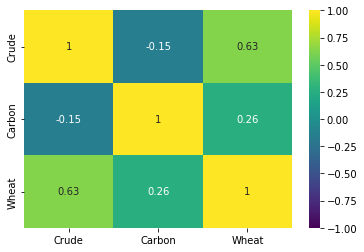

In [192]:
# Show correlation matrix
sns.heatmap(returns.corr(),cmap='viridis',annot=True,vmin=-1, vmax=1);

# Import Wheat Data

In [193]:
# Get historical wheat price data from investpy
wheat_df = pd.read_csv("../Data/wheat_df-Update.csv",parse_dates=True,infer_datetime_format=True,index_col='Date')
                    
                      

# Import Copper Data

In [194]:
# Get historical copper price data from investpy
copper_df =pd.read_csv("../Data/copper_df-Update.csv",parse_dates=True,infer_datetime_format=True,index_col='Date')

# Import Dollar_index Data

In [195]:
# Get historical Dollar Index data from investpy
dollar_df = pd.read_csv("../Data/dollar_df-Update.csv",parse_dates=True,infer_datetime_format=True,index_col='Date')

# Import drought dataset

In [196]:
#drought dataset
drought_df = pd.read_csv("../Data/drought_df-Update.csv",parse_dates=True,infer_datetime_format=True,index_col='Date')
drought_df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

# Import Urea dataset

In [197]:
# Urea dataset
Urea_df = pd.read_csv("../Data/Urea_df-Update.csv",parse_dates=True,infer_datetime_format=True,index_col='Date')

In [198]:
# Combine data frames
combined_df = pd.concat([dollar_df,copper_df,Urea_df,drought_df,wheat_df],axis=1,join='inner')

In [199]:
# Create correlation matrix
correlations_df = combined_df.corr()
correlations_df

,Dollar,Copper,Urea,Drought,wheat
Dollar,1.000000,-0.524551,-0.312546,0.482855,-0.680653
Copper,-0.524551,1.000000,0.719500,-0.647951,0.705907
Urea,-0.312546,0.719500,1.000000,-0.463255,0.680342
Drought,0.482855,-0.647951,-0.463255,1.000000,-0.621489
wheat,-0.680653,0.705907,0.680342,-0.621489,1.000000


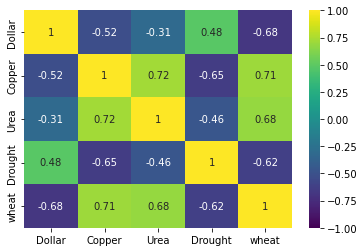

In [200]:
# Show correlation matrix
sns.heatmap(correlations_df,cmap='viridis',annot=True,vmin=-1,vmax=1);

# Import Wheat Data

In [201]:
# Get historical wheat price data from investpy
wheat_df = pd.read_csv("../Data/wheat_df-Update.csv",parse_dates=True,infer_datetime_format=True,
                       index_col='Date')

# Import Crude Data

In [202]:
# Get historical crude oil price data from investpy
crude_df = pd.read_csv("../Data/crude_df-Update.csv",parse_dates=True,infer_datetime_format=True,
                       index_col='Date')
   

# Import Carbon futures data

In [203]:
# Get historical Carbon futures price data from investpy
Carbon_df = pd.read_csv("../Data/Carbon_df-Update.csv",parse_dates=True,infer_datetime_format=True,
                       index_col='Date')

In [204]:
# Combine data frames
combined_df_ = pd.concat([crude_df,Carbon_df,wheat_df],axis=1,join='inner')

In [205]:
# Create correlation matrix
correlations_df = combined_df_.corr()
correlations_df

,Crude,carbon futures,wheat
Crude,1.000000,-0.149471,0.630284
carbon futures,-0.149471,1.000000,0.260287
wheat,0.630284,0.260287,1.000000


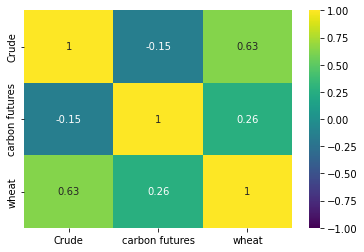

In [206]:
# Show correlation matrix
sns.heatmap(correlations_df,cmap='viridis',annot=True,vmin=-1,vmax=1);